<a href="https://www.kaggle.com/code/zeeshanahmadyar/california-housing?scriptVersionId=300599533" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Import Important Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# set random seed for reproducibility
np.random.seed(42)
print('All Libraries Loaded Successfully!')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

All Libraries Loaded Successfully!


# **Load Data**

In [2]:
housing = fetch_california_housing(as_frame=True)

X = housing.data
y = housing.target

print(f'Features (X) shape: {X.shape}')
print(f'Features (y) shape: {y.shape}')

print('\nDataset Description:')
print(housing.DESCR[:500]+ "...")

Features (X) shape: (20640, 8)
Features (y) shape: (20640,)

Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...


# **Display basic information about dataset**

In [3]:
print('Feature Name:')
print(X.columns.tolist())

print('\nFirst 5 rows of Features:')
print(X.head())

print('\nFirst 5 rows of target:')
print(y.head())

print('\nBasic Statistics:')
print(X.describe())

Feature Name:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows of Features:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

First 5 rows of target:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Basic Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671   

# **Data Exploration and Visualization**
**Check missing values**

In [4]:
print('Missing Values in Featueres:')
print(X.isnull().sum())

print('\nMissing Values in Featueres:')
print(y.isnull().sum())

Missing Values in Featueres:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing Values in Featueres:
0


# **Basic Statistics**

In [5]:
print('Target Variable Statistics:')
print(f'Mean House Value: ${y.mean():.2f} (in hundreds of thousand)')
print(f'Median House Value: ${y.median():.2f} (in hundreds of thousand)')
print(f'Min House Value: ${y.min():.2f} (in hundreds of thousand)')
print(f'Max House Value: ${y.max():.2f} (in hundreds of thousand)')

Target Variable Statistics:
Mean House Value: $2.07 (in hundreds of thousand)
Median House Value: $1.80 (in hundreds of thousand)
Min House Value: $0.15 (in hundreds of thousand)
Max House Value: $5.00 (in hundreds of thousand)


# **Create Visualizations**

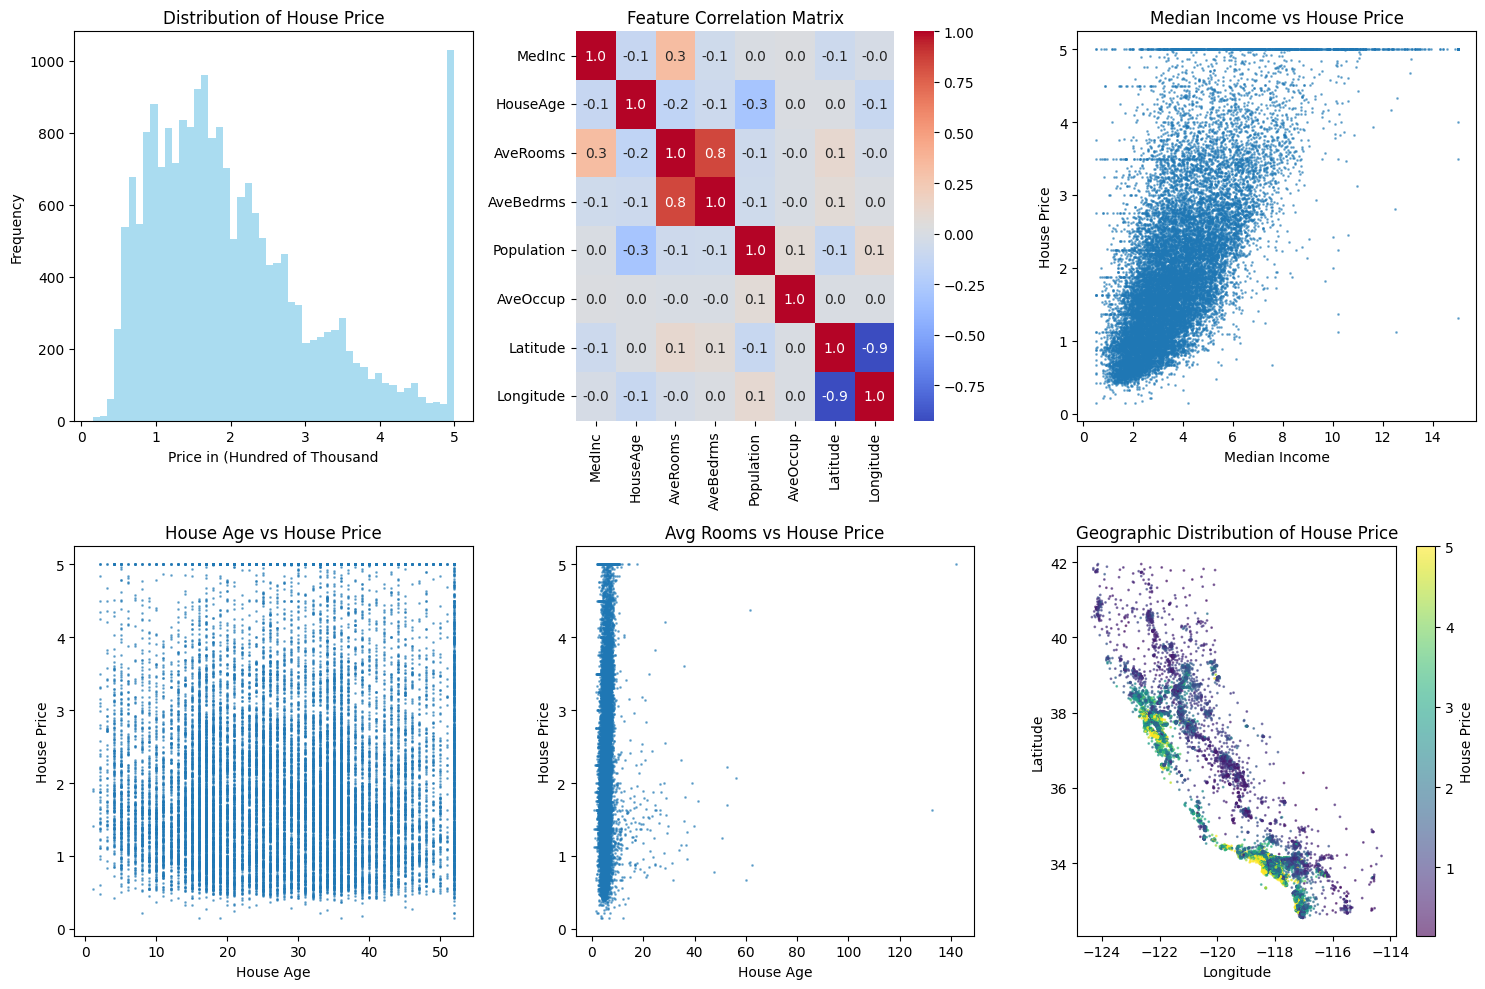

In [6]:
plt.figure(figsize=(15, 10))

# distribution of target var
plt.subplot(2, 3, 1)
plt.hist(y, bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of House Price')
plt.xlabel('Price in (Hundred of Thousand')
plt.ylabel('Frequency')

# correlation heatmap
plt.subplot(2, 3, 2)
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Feature Correlation Matrix')

# Scatterplot: MedInc
plt.subplot(2, 3, 3)
plt.scatter(X['MedInc'], y, alpha=0.5, s=1)
plt.title('Median Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')

# Scatterplot: House Age vs Price
plt.subplot(2, 3, 4)
plt.scatter(X['HouseAge'], y, alpha=0.5, s=1)
plt.title('House Age vs House Price')
plt.xlabel('House Age')
plt.ylabel('House Price')

# Scatter: AveRooms vs Price
plt.subplot(2, 3, 5)
plt.scatter(X['AveRooms'], y, alpha=0.5, s=1)
plt.title('Avg Rooms vs House Price')
plt.xlabel('House Age')
plt.ylabel('House Price')

# Geographic Plot
plt.subplot(2, 3, 6)
plt.scatter(X['Longitude'], X['Latitude'], c=y, cmap='viridis', alpha=0.6, s=1)
plt.colorbar(label='House Price')
plt.title('Geographic Distribution of House Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

# **Data Preprocessing and Cleaning**
**Splits Dataset into training and testing sets**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print('Data Split Completed')

Data Split Completed


In [8]:
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')

print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (16512, 8)
y_train Shape: (16512,)
X_test Shape: (4128, 8)
y_test Shape: (4128,)


In [9]:
print(f'\nTraining Set: {len(X_train)} Samples ({len(X_test) / len(X)*100:.1f}%)')
print(f'\nTesting Set: {len(X_test)} Samples ({len(X_test) / len(X)*100:.1f}%)')


Training Set: 16512 Samples (20.0%)

Testing Set: 4128 Samples (20.0%)


# **Scaler feature using Standard Scaler**

In [10]:
scaler = StandardScaler()

In [11]:
# fit scaler on training data and transform both training and testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Feature Scaling Complete')

Feature Scaling Complete


In [12]:
print('Original X_train Statics:')
print(f'Mean {X_train.mean().mean():.3f}')
print(f'std {X_train.std().mean():.3f}')

print('\nScaled X_train Statics:')
print(f'Mean {X_train_scaled.mean().mean():.3f}')
print(f'std {X_train_scaled.std().mean():.3f}')

Original X_train Statics:
Mean 173.079
std 146.263

Scaled X_train Statics:
Mean 0.000
std 1.000


# **Model Training**
**Initialize Linear Regression model**

In [13]:
model = LinearRegression()

In [14]:
# train the model
model.fit(X_train_scaled, y_train)
print('Model Training Completed')

Model Training Completed


In [15]:
print('\nModel Coefficient: {model.coef_}')
print('\nModel Coefficient: {model.intercept_:.4f}')


Model Coefficient: {model.coef_}

Model Coefficient: {model.intercept_:.4f}


# **Model Evaluation**
**make prediction on both training and testing sets**

In [16]:
X_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# **Calculate Evaluation Metrix**

In [17]:
train_mse = mean_squared_error(y_train, X_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, X_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Model Evaluation Result:')
print('=' * 40)
print('Training Set')

print(f'Mean Squared Error: {train_mse:.4f}')
print(f'Root Mean Squared Error: {np.sqrt(train_mse):.4f}')
print(f'R2 Score: {train_r2:.4f}')

Model Evaluation Result:
Training Set
Mean Squared Error: 0.5179
Root Mean Squared Error: 0.7197
R2 Score: 0.6126


In [18]:
print('Model Evaluation Result:')
print('=' * 40)
print('Testing Set')

print(f'Mean Squared Error: {test_mse:.4f}')
print(f'Root Mean Squared Error: {np.sqrt(test_mse):.4f}')
print(f'R2 Score: {test_r2:.4f}')

Model Evaluation Result:
Testing Set
Mean Squared Error: 0.5559
Root Mean Squared Error: 0.7456
R2 Score: 0.5758


In [19]:
print('Model Peformance Summary:')
print(f'The model explain {test_r2*100:.1f} of tha varience in house price')
print(f'Average Prediction Error: ${np.sqrt(test_mse)*100:.0f}K')

Model Peformance Summary:
The model explain 57.6 of tha varience in house price
Average Prediction Error: $75K


# **Visualize Actual vs Prediction**

Text(0.5, 1.0, 'Training Set \nR2= 0.613')

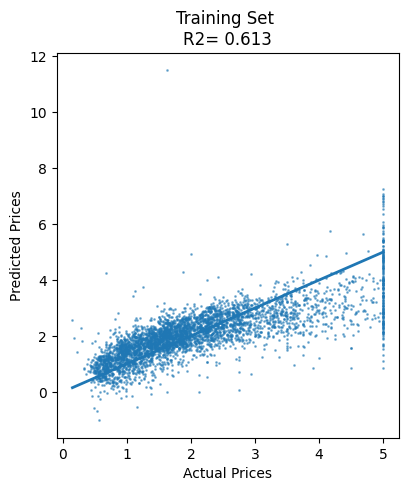

In [20]:
plt.figure(figsize=(15, 5))

# training set predicting
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Training Set \nR2= {train_r2:.3f}')

Text(0.5, 1.0, 'Test set \nR2 0.576')

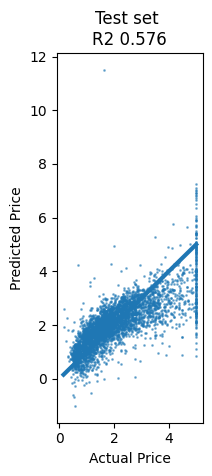

In [21]:
# test prediction
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Test set \nR2 {test_r2:.3f}')

# **Residual Plot**

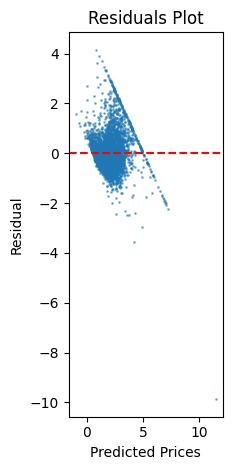

In [22]:
plt.subplot(1, 3, 3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5, s=1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residual')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

# **Model Saving**
Save the training model using pickle

In [23]:
model_filename = 'linear_regression_model.pkl'
with open (model_filename, 'wb') as file:
    pickle.dump(model, file)

print('Model save to', model_filename)

Model save to linear_regression_model.pkl


In [24]:
# Save the scaler as well (very important for development)
scaler_filename = 'scaler.pkl'
with open (scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print('Model save to', scaler_filename)

Model save to scaler.pkl
